In [83]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [84]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [85]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [86]:
%matplotlib inline

In [87]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(17646, 28)
(17646, 8)


# Multivariate Linear Regression (Foot prediction)

In [88]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
# Entries where FR is swinging
idxs = np.where(X_relative_footsteps_acc[:, 22] == 1)[0]
X_relative_footsteps_acc_FR_swinging = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_FR_swinging = Y_relative_footsteps_acc[idxs]

## Predict FR foot -> x

In [90]:
X_relative_footsteps_acc_FR_swinging[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.04003644, -0.06632428,
        0.05440154,  0.00439207,  0.02899047,  0.02653936,  0.22664036,
        0.18001143, -0.4086564 ,  0.23994108, -0.16991884, -0.40835668,
       -0.2385218 ,  0.16382314, -0.41169444, -0.25160387, -0.15317046,
       -0.41252498,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [91]:
Y_relative_footsteps_acc_FR_swinging[0, :]

array([ 0.22800851,  0.17177425,  0.23270544, -0.17693889, -0.24620022,
        0.1547656 , -0.24999362, -0.16156544])

### Linear Regression

In [129]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_x = LinearRegression()

# Fit the model
model_fr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9022581762343156
RMSE:  0.007875509515161446
The lowest error is:  7.323993312935428e-07
The highest error is:  0.0394419967347448
The avg. error is:  0.0055751255040856935


In [132]:
model_fr_relative_swinging_x.coef_

array([[-0.04971126, -0.04972579, -0.12536155, -0.05510811,  0.01027304,
        -0.00793679, -0.03434949,  0.21516733,  0.32945695,  0.12989169,
         0.06270029,  0.3237381 , -0.37955112, -0.24186487]])

In [133]:
model_fr_relative_swinging_x.intercept_

array([-0.02072315])

Text(0, 0.5, 'Predictions')

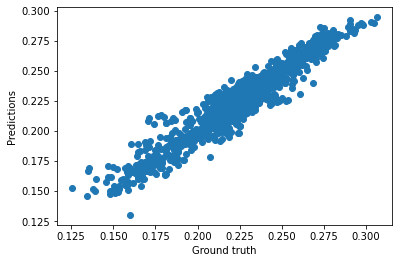

In [131]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [47]:
#%store model_fr_relative_swinging_x

In [48]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [49]:
# Save model
#joblib.dump(model_fr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_x.sav")

### Predict FL foot -> y

In [160]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_y = LinearRegression()

# Fit the model
model_fr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8918930540124943
RMSE:  0.01132288603340809
The lowest error is:  1.3331368377833552e-06
The highest error is:  0.05800580692831443
The avg. error is:  0.007938115557221117


In [163]:
model_fr_relative_swinging_y.coef_

array([[-0.04666457, -0.08932719, -0.22858309,  0.01694849, -0.04152483,
        -0.10641105,  0.13819043, -0.35376004, -0.35298952,  0.72883976,
         0.56013107, -0.14740541, -0.34839678, -0.12229748]])

In [161]:
model_fr_relative_swinging_y.intercept_

array([0.11902929])

Text(0, 0.5, 'Predictions')

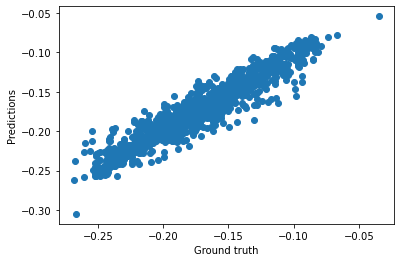

In [162]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [35]:
#%store model_fr_relative_swinging_y

In [36]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [37]:
# Save model
#joblib.dump(model_fr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_y.sav")